In [535]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [340]:
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic = pd.read_csv(url)
print(np.shape(titanic))
titanic.head(10)

(887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [341]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [356]:
titanic.drop(columns = ["Name"], inplace = True)

In [344]:
# This data is clean, if there were empty or NA values, we could replacements like these.
#titanic["Age"].fillna(med_age, inplace = True)
#titanic["Fare"].fillna(med_fare, inplace = True)
#titanic.isnull().sum()

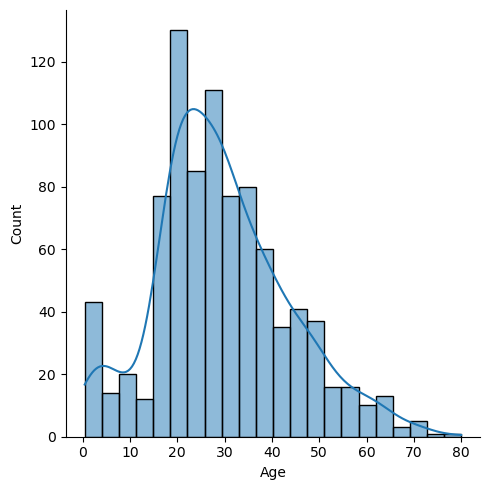

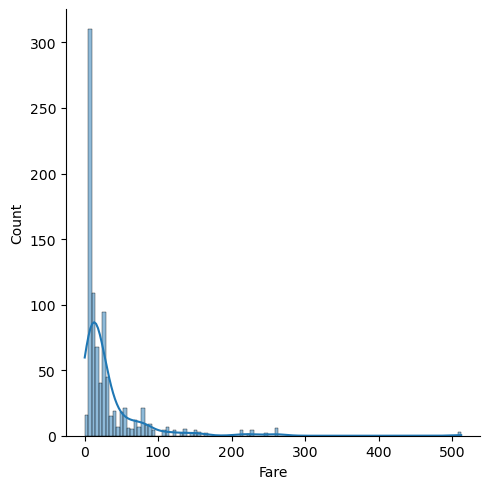

In [357]:
sns.displot(titanic["Age"], kde = True)
sns.displot(titanic["Fare"], kde = True)
plt.show()

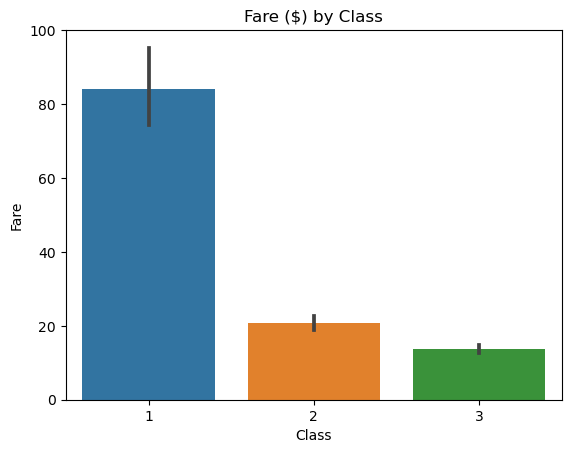

In [358]:
sns.barplot(data = titanic, x = "Pclass", y = "Fare")
plt.title("Fare ($) by Class")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.show()

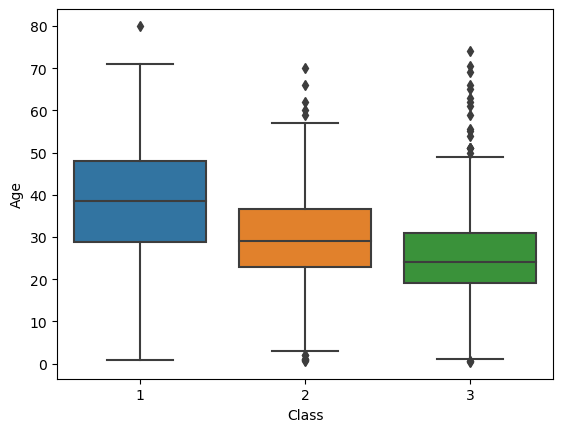

In [359]:
sns.boxplot(data = titanic, x = "Pclass", y = "Age")
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()

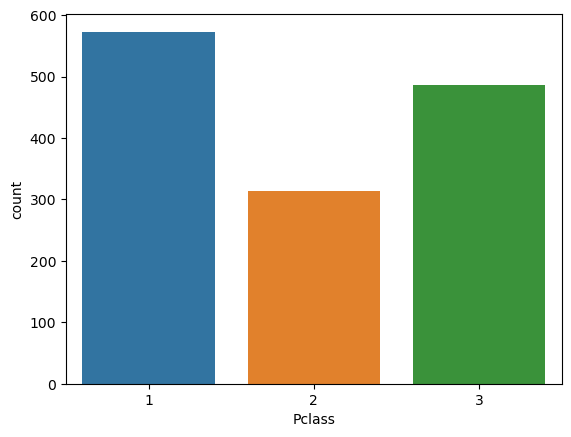

In [360]:
sns.countplot(data = titanic, x = "Sex")
sns.countplot(data = titanic, x = "Pclass")
plt.show()

In [361]:
titanic['sex_encoded'] = titanic['Sex'].map({'male': 0, 'female': 1})
df_encoded = titanic.drop(columns = ["Sex"])
corr = df_encoded.corr()
df_encoded.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,sex_encoded
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


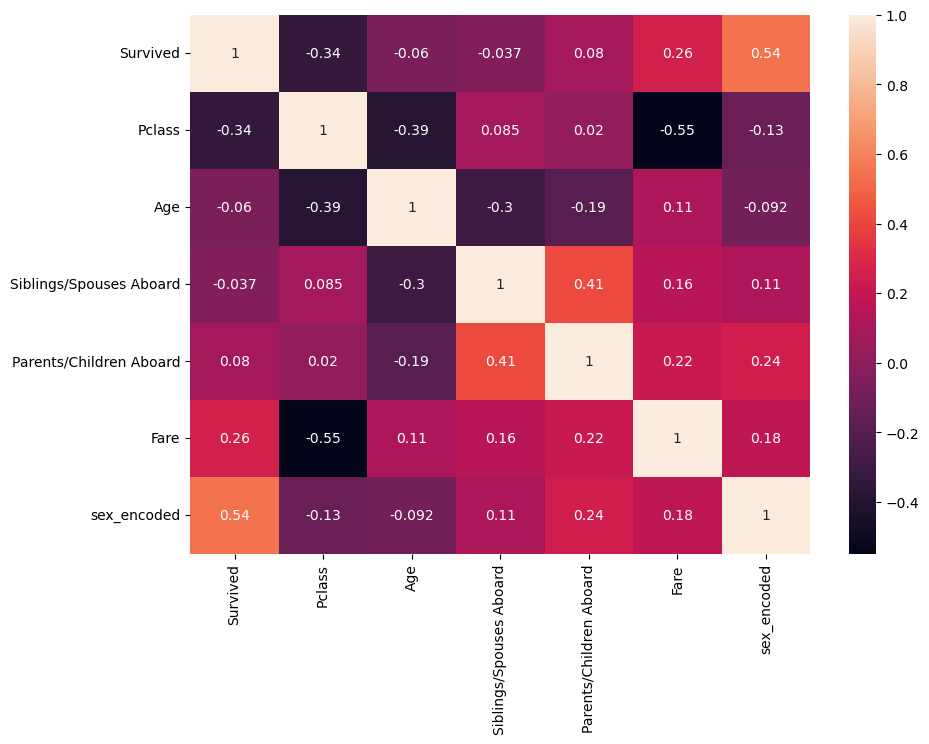

In [362]:
plt.figure(figsize= (10,7))
sns.heatmap(corr, annot = True)
plt.show()

In [396]:
X, y = df_encoded.drop(columns = ["Survived"]), titanic["Survived"]
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [397]:
X_test, X_train, y_test, y_train = train_test_split(X_scaled, y, test_size = 0.2, random_state = 19)
log_reg = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
}

In [413]:
grid_1 = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy')
model_1 = grid_1.fit(X_train,y_train)
#results = pd.DataFrame(grid_search.cv_results_)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 10, 'penalty': 'l2'}
Best score: 0.7982539682539682


In [451]:
best_logit = model_1.best_estimator_
cv_array = cross_val_score(best_logit, X_train, y_train, cv=5)
print('5-fold cross validation score of best logit', cv_array.mean().round(3))
y_pred = best_logit.predict(X_test)
test_accuracy_1 = accuracy_score(y_test, y_pred)
print('Logit test score', test_accuracy.round(3))

5-fold cross validation score of best logit 0.798
Logit test score 0.787


In [458]:
y_prob = best_logit.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

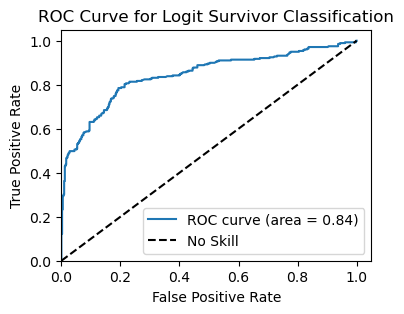

In [474]:
plt.figure(figsize = (4,3))  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logit Survivor Classification')
plt.legend()
plt.show()

In [435]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [2, 5, 10, 50, 100],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Grid search
grid_2 = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
model_2 = grid_2.fit(X_train, y_train)


print("Best parameters:", model_2.best_params_)
print("Best score:", model_2.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 5}
Best score: 0.8260317460317461


In [453]:
best_xgb = model_2.best_estimator_
cv_array_2 = cross_val_score(best_xgb, X_train, y_train, cv=5)

y_pred_2 = best_xgb.predict(X_test)
test_accuracy_2 = accuracy_score(y_test, y_pred_2)
print('5-fold cross validation of best XGB Classifier', cv_array_2.mean().round(3))
print('XGB Test Score', test_accuracy_2.round(3))

5-fold cross validation of best XGB Classifier 0.826
XGB Test Score 0.776


In [460]:
y_prob_2 = best_xgb.predict_proba(X_test)[:,1]
fpr2, tpr2, _ = roc_curve(y_test, y_prob_2)
roc_auc_2 = auc(fpr2, tpr2)

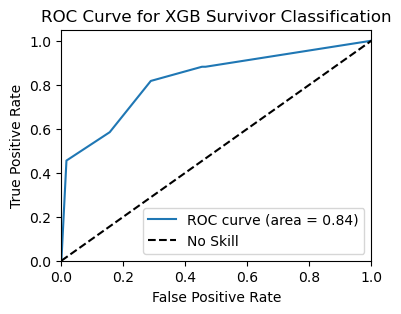

In [473]:
plt.figure(figsize = (4,3))
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGB Survivor Classification')
plt.legend()
plt.show()

In [536]:
knn = KNeighborsClassifier()
params = {'n_neighbors': [3,5,7,9,11,13,15,17,19]}
grid_3 = GridSearchCV(estimator = knn, param_grid = params, cv = 5, scoring = 'accuracy', return_train_score=False)
model_3 = grid_3.fit(X_train, y_train)
#print(model_3.best_params_)

C:\Users\liamm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\liamm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [517]:
print(model_3.best_params_)
print(model_3.best_score_.round(3))

y_pred3 = model_3.predict(X_test)
print(accuracy_score(y_pred3, y_test).round(3))

{'n_neighbors': 15}
0.787
0.773


C:\Users\liamm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [562]:
neighbors = np.array([3,5,7,9,11,13,15,17,19])
knn_accuracy = np.zeros(len(neighbors))
for i in range(len(neighbors)):
    knn = KNeighborsClassifier(n_neighbors = neighbors[i])
    model = knn.fit(X_train,y_train)
    knn_accuracy[i] = model.score(X_train,y_train)

C:\Users\liamm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\liamm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

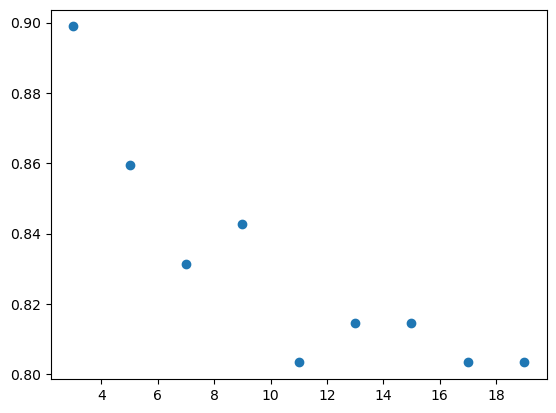

In [563]:
plt.figure()
plt.scatter(neighbors, knn_accuracy)
plt.show()

In [ ]:

knn_mod = KNeighborsClassifier()
supp_mod = SVC()
rf_mod = RandomForestClassifier()
tree_mod = DecisionTreeClassifier()

NameError: name 'estimator' is not defined

0.7866666666666667
